In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [ ]:
def get_pictures(folder):
    Images= []
    Labels = []
    label =0
    for labels in os.listdir(folder):
        if labels == 'angry':
            label = 0
        elif labels == 'disgust':
            label =1
        elif labels == 'fear':
            label = 2
        elif labels == 'happy':
            label = 3
        elif labels == 'neutral':
            label = 4
        elif labels == 'sad':
            label = 5
        elif labels == 'surprise':
            label = 6
        for images in os.listdir(folder+labels):
            try:
                image = cv2.imread(folder+labels+r'/'+images)
                image = cv2.resize(image, (224,224))
                Images.append(image)
                Labels.append(label)
            except:
                None
    return shuffle(Images, Labels, random_state= 12863686)

def get_labels(code):
    labels = {0:"angry", 1:"disgust", 2:"fear", 3:"happy", 4:"neutral", 5:"sad", 6:"surprise"}
    
    return labels[code]

In [ ]:
!ls '/content/drive/My Drive/Data_Science/facial_expression/'

images	train.zip  validation.zip


In [ ]:
!unzip -q '/content/drive/My Drive/Data_Science/facial_expression/train.zip'

In [ ]:
cd train

/content/train


In [ ]:
ls

angry/  disgust/  fear/  happy/  neutral/  sad/  surprise/


In [ ]:
Images, Labels = get_pictures('/content/train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [ ]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (28821, 224, 224, 3)
Shape of Labels: (28821,)


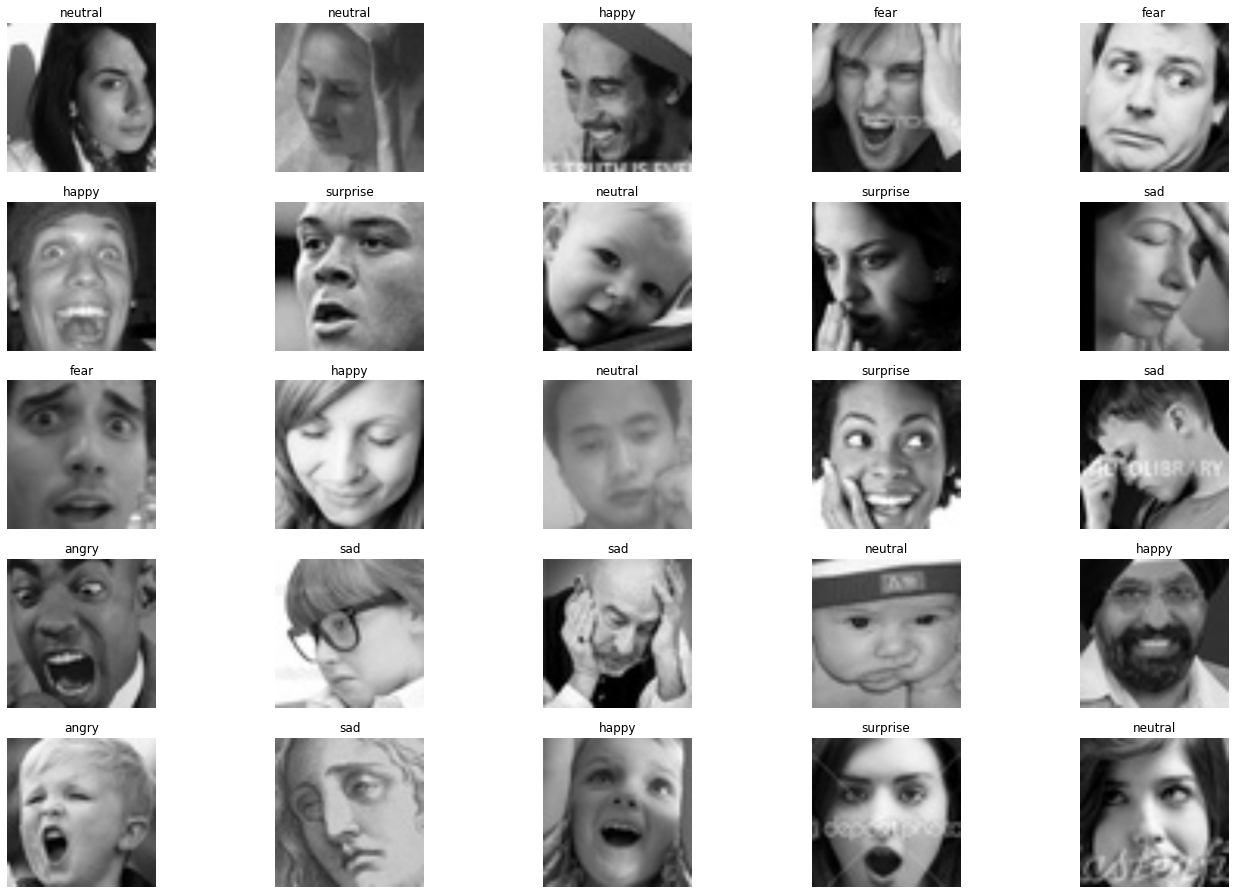

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_labels(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D
from matplotlib import pyplot as plt
import tensorflow

In [ ]:
new_images =[]
for i in Images:
    image= cv2.cvtColor(i, cv2.COLOR_BGR2GRAY )
    new_images.append(image)
new_images =  np.array(new_images)
new_images = np.expand_dims(new_images, axis=-1)
print(new_images.shape)

(28821, 224, 224, 1)


In [ ]:
def model5(input_size,output_size):
    model = Sequential()

    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))


    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [ ]:
img_rows, img_cols = 100,100
model = model5([img_rows, img_cols,3],7)

In [ ]:
history_model = trained = model.fit(Images,Labels,epochs=100,validation_split=0.20)

Epoch 1/100
721/721 [==============================] - 19s 26ms/step - loss: 5.0546 - accuracy: 0.2734 - val_loss: 5.5044 - val_accuracy: 0.2819
Epoch 2/100
721/721 [==============================] - 18s 25ms/step - loss: 3.6752 - accuracy: 0.3108 - val_loss: 3.4338 - val_accuracy: 0.3280
Epoch 3/100
721/721 [==============================] - 19s 26ms/step - loss: 2.8147 - accuracy: 0.3415 - val_loss: 1.6043 - val_accuracy: 0.3778
Epoch 4/100
721/721 [==============================] - 18s 26ms/step - loss: 2.1347 - accuracy: 0.3659 - val_loss: 1.6149 - val_accuracy: 0.3998
Epoch 5/100
721/721 [==============================] - 18s 25ms/step - loss: 1.7161 - accuracy: 0.3997 - val_loss: 1.5761 - val_accuracy: 0.4128
Epoch 6/100
721/721 [==============================] - 18s 26ms/step - loss: 1.4946 - accuracy: 0.4250 - val_loss: 1.5364 - val_accuracy: 0.4099
Epoch 7/100
721/721 [==============================] - 18s 26ms/step - loss: 1.4223 - accuracy: 0.4523 - val_loss: 1.4113 - val_ac

In [ ]:
model.save("new_facial_expression.h5")

In [ ]:
from google.colab import files
files.download('new_facial_expression.h5')

In [ ]:
!unzip -q '/content/drive/My Drive/Data_Science/facial_expression/validation.zip'

In [ ]:
cd validation

/content/train/validation


In [ ]:
ls


angry/  disgust/  fear/  happy/  neutral/  sad/  surprise/


In [ ]:
pred_images,no_labels = get_pictures('/content/train/validation/')
pred_images = np.array(pred_images)
pred_images.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


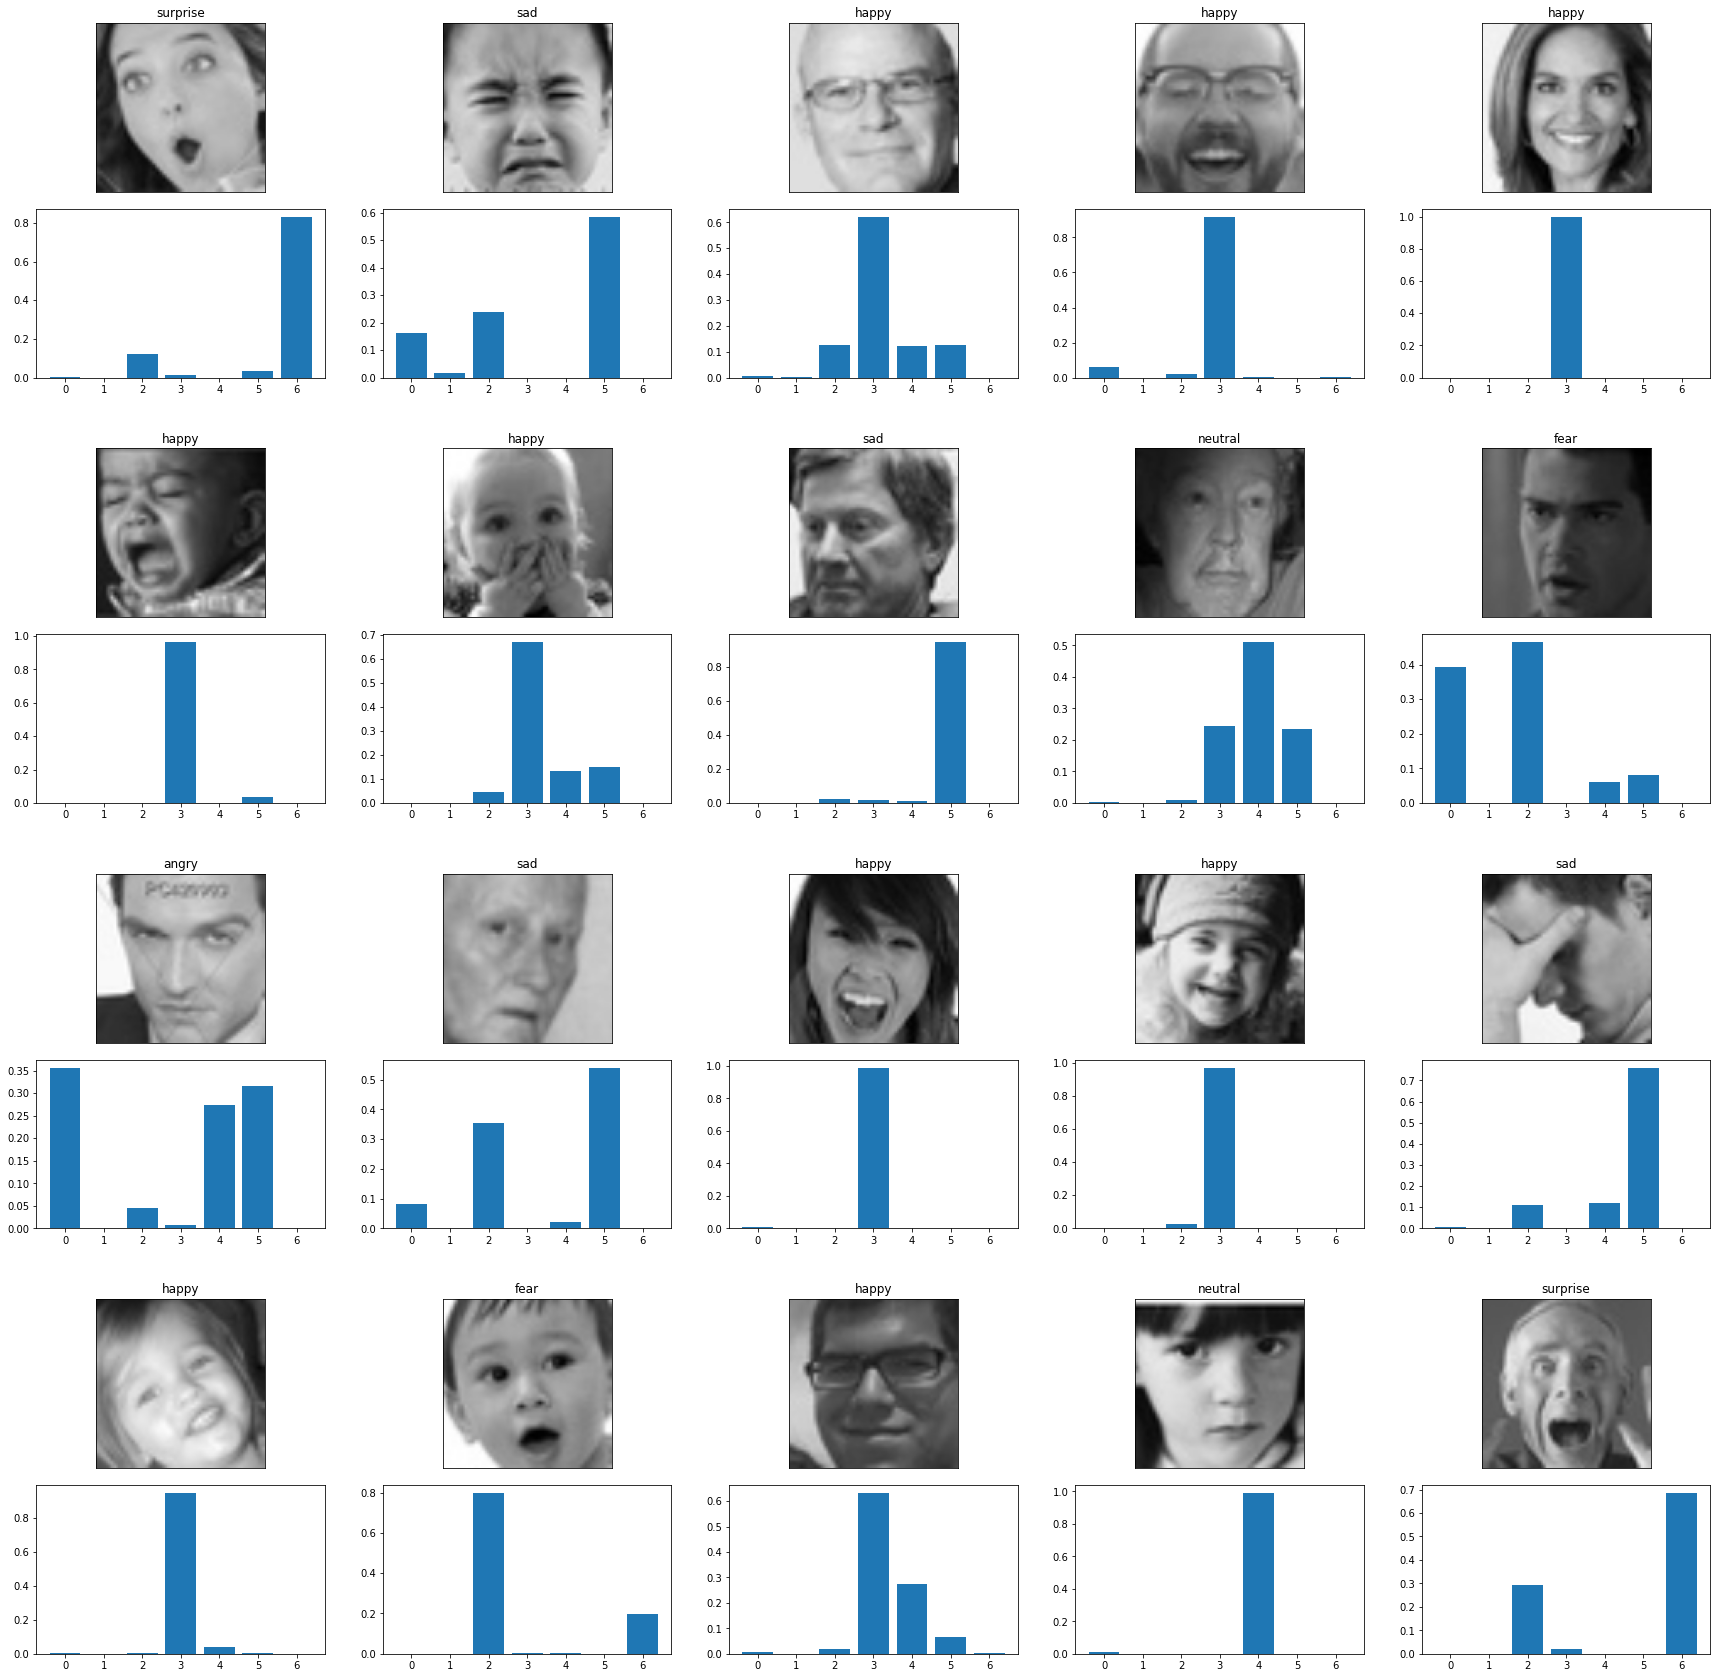

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(4, 5, wspace=0.2, hspace=0.2)

for i in range(20):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_labels(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(7)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
IMAGE_SIZE = [224, 224]
tensorflow.compat.v1.get_default_graph
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = trained = model.fit(Images,Labels,epochs=30,validation_split=0.20, batch_size=5)

Epoch 1/30
4612/4612 [==============================] - 143s 31ms/step - loss: 40.6653 - accuracy: 0.4396 - val_loss: 43.2208 - val_accuracy: 0.4788
Epoch 2/30
4612/4612 [==============================] - 142s 31ms/step - loss: 29.1777 - accuracy: 0.6112 - val_loss: 51.1697 - val_accuracy: 0.5060
Epoch 3/30
4612/4612 [==============================] - 142s 31ms/step - loss: 23.2884 - accuracy: 0.6850 - val_loss: 59.7206 - val_accuracy: 0.4942
Epoch 4/30
4612/4612 [==============================] - 141s 31ms/step - loss: 19.3634 - accuracy: 0.7317 - val_loss: 74.2222 - val_accuracy: 0.4741
Epoch 5/30
4612/4612 [==============================] - 142s 31ms/step - loss: 16.0962 - accuracy: 0.7736 - val_loss: 72.8391 - val_accuracy: 0.5065
Epoch 6/30
4612/4612 [==============================] - 142s 31ms/step - loss: 13.7212 - accuracy: 0.8026 - val_loss: 81.8089 - val_accuracy: 0.5131
Epoch 7/30
4612/4612 [==============================] - 142s 31ms/step - loss: 12.2320 - accuracy: 0.8234 

In [ ]:
model.save("vgg_model.h5")